In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv("df.csv")
data.head()


,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


In [88]:
data.shape

(100, 11)

In [89]:
data.corr()
# největší vliv na hodnotu Y má ukazatel FL  r = 0.759

C:\Users\a00556901\AppData\Local\Temp\ipykernel_10576\1313896432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000


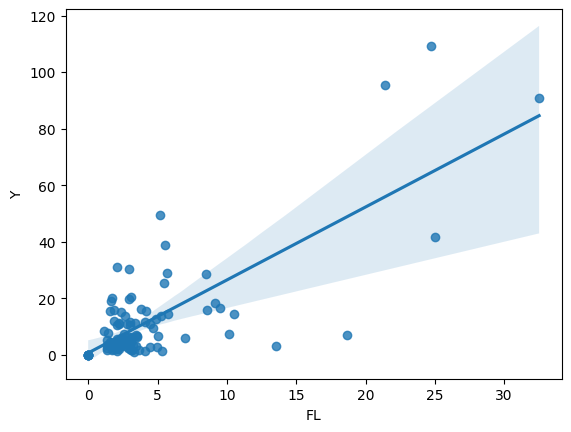

In [90]:
g = sns.regplot(data=data, x="FL", y="Y")

In [119]:
# regresní model pro všechny proměnné
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
model = smf.ols(formula=formula, data=data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.45e-18
Time:                        18:10:17   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
CR             1.5014      1.240      1.211      0.229      -0.961       3.964
DA            -5.2206      9.370     -0.557      0.579     -23.834      13.392
FL             3.0104      1.060      2.840      0.006       0.905       5.116
OPM           23.4665      8.076      2.906      0.005       7.425      39.508
RT            -0.0063      0.021     -0.300      0.765      -0.048       0.035
TAT            8.4254      2.351      3.584      0.001       3.756      13.095
DE            -0.7283      2.066     -0.352      0.725      -4.833       3.376
PT            -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# regresní model pro signifikantní proměnné
formula = "Y ~ FL + OPM + TAT"
model = smf.ols(formula=formula, data=data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        18:10:23   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# odhad ukazatele Y
data["Y_predicted"] = result.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358


In [122]:
# rozdíl mezi Y a Y_predicted
data["Y_diff"] = data["Y_predicted"] - data["Y"]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Y_diff
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358


In [123]:
# nejvyšší hodnota rozdílu
max_diff = data["Y_diff"].max()
max_diff

34.80954531308494

In [124]:
# nejvyšší absolutní hodnota rozdílu
data["Abs_Y_diff"] = abs(data["Y_predicted"] - data["Y"])
abs_max_diff = data["Abs_Y_diff"].max()
abs_max_diff


42.54069427571926

In [125]:
#radek max. rozdil
idx_max_diff = data["Y_diff"].idxmax()
max_diff_row = data.loc[idx_max_diff]
max_diff_row
# predikovaná hodnota vyšší než skutečná, rozdíl = 34.809 - akcie ve skutečnosti podhodnocená, pokud budeme brát model jako relevantní

Company              SYXLy
CR                    0.76
DA                    0.37
FL                   18.64
OPM                 0.0631
RT                   12.44
TAT                   0.41
DE                    6.93
Y                     6.97
PT                     3.4
Sector         Industrials
Y_predicted      41.779545
Y_diff           34.809545
Abs_Y_diff       34.809545
Name: 79, dtype: object

In [126]:
#radek max. absolutni rozdil
idx_abs_max_diff = data["Abs_Y_diff"].idxmax()
abs_max_diff_row = data.loc[idx_abs_max_diff]
abs_max_diff_row
#v tomto případě náš model hodnotu akcie podcenil o 42.54

Company                     jhFdg
CR                           1.09
DA                           0.48
FL                           24.7
OPM                        0.1913
RT                          13.43
TAT                          1.16
DE                           11.9
Y                          109.24
PT                           4.76
Sector         Consumer Defensive
Y_predicted             66.699306
Y_diff                 -42.540694
Abs_Y_diff              42.540694
Name: 45, dtype: object

In [127]:
# Bonus 1 - robustní regrese -all
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       91
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 16 Nov 2023                                         
Time:                        18:10:47                                         
No. Iterations:                    37                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4961      3.453     -3.039      0.002     -17.265      -3.728
CR             2.0316      0.801      2.537      0.011       0.462       3.601
DA            -0.4762      6.052     -0.079      0.937     -12.338      11.386
FL             3.6694      0.685      5.360      0.000       2.328       5.011
OPM           16.3810      5.216      3.140      0.002       6.158      26.604
RT            -0.0029      0.014     -0.216      0.829      -0.029       0.024
TAT            5.2670      1.518      3.469      0.001       2.291       8.243
DE            -2.5507      1.335     -1.911      0.056      -5.166       0.065
PT            -0.0878      0.062     -1.412      0.158      -0.210       0.034
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [128]:
# Bonus 1 - robustní regrese - signif
formula = "Y ~ CR + FL + OPM + TAT"
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       95
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 16 Nov 2023                                         
Time:                        18:11:02                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9579      1.924     -5.176      0.000     -13.729      -6.187
CR             2.0977      0.681      3.081      0.002       0.763       3.432
FL             2.4422      0.123     19.840      0.000       2.201       2.683
OPM           13.9913      4.560      3.068      0.002       5.054      22.929
TAT            5.3858      1.290      4.176      0.000       2.858       7.913
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [129]:
# Bonus 1 - odhad ukazatele Y
data["Y_predicted_robust"] = res.predict(data)
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Y_diff,Abs_Y_diff,Y_predicted_robust
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641,1.447641,1.167348
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512,16.096512,20.203407
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282,0.835282,7.832927
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512,9.538512,11.557664
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358,1.701358,-0.085471


In [130]:
# Bonus 1 - rozdíl mezi Y a Y_predicted
data["Y_diff_robust"] = data["Y_predicted_robust"] - data["Y"]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_predicted,Y_diff,Abs_Y_diff,Y_predicted_robust,Y_diff_robust
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641,1.447641,1.167348,-0.782652
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512,16.096512,20.203407,12.943407
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282,0.835282,7.832927,0.052927
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512,9.538512,11.557664,5.387664
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358,1.701358,-0.085471,-0.085471


In [134]:
# Bonus 1 - nejvyšší hodnota rozdílu
idx_max_diff_robust = data["Y_diff_robust"].idxmax()
max_diff_row_robust = data.loc[idx_max_diff_robust]
max_diff_row_robust
#predikovaná hodnota vyšší než skutečná o 33.28, stejná akcie jako v předchozím modelu

Company                     SYXLy
CR                           0.76
DA                           0.37
FL                          18.64
OPM                        0.0631
RT                          12.44
TAT                          0.41
DE                           6.93
Y                            6.97
PT                            3.4
Sector                Industrials
Y_predicted             41.779545
Y_diff                  34.809545
Abs_Y_diff              34.809545
Y_predicted_robust      40.250244
Y_diff_robust           33.280244
Name: 79, dtype: object

In [137]:
# Bonus 1 - nejvyšší absolutní hodnota rozdílu
data["Abs_Y_diff_robust"] = abs(data["Y_predicted_robust"] - data["Y"])
idx_abs_max_diff_robust = data["Abs_Y_diff_robust"].idxmax()
abs_max_diff_row_robust = data.loc[idx_abs_max_diff_robust]
abs_max_diff_row_robust
#predikovaná hodnota nižší než skutečná o 42.54, stejná akcie jako v předchozím modelu

Company                            jhFdg
CR                                  1.09
DA                                  0.48
FL                                  24.7
OPM                               0.1913
RT                                 13.43
TAT                                 1.16
DE                                  11.9
Y                                 109.24
PT                                  4.76
Sector                Consumer Defensive
Y_predicted                    66.699306
Y_diff                        -42.540694
Abs_Y_diff                     42.540694
Y_predicted_robust             61.575338
Y_diff_robust                 -47.664662
Abs_Y_diff_robust              47.664662
Name: 45, dtype: object